## <font size=5> <strong>Project Title : Heart Disease Prediction
Name: RAJESHWARI RAORANE



## I. Importing essential libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


## II. Importing and understanding our dataset

In [54]:
dataset = pd.read_csv("heart.csv")

In [55]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Verifying it as a 'dataframe' object in pandas

In [56]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [57]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [58]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1


#### Description

In [60]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
# Checking duplicated values
print("Number of duplicated rows:", dataset.duplicated().sum())

# Droped duplicated values
dataset = dataset.drop_duplicates()

Number of duplicated rows: 1


In [63]:
# Checking duplicated values
print("Number of duplicated rows:", dataset.duplicated().sum())

Number of duplicated rows: 0


In [64]:
# Checking missing values
print(dataset.isnull().sum())

# if there are any missing values, we'll fill them with the median of the column
dataset = dataset.fillna(dataset.median())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [65]:
#We have no missing values

#### Let's understand our columns better:

In [66]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [67]:
dataset["target"].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [68]:
dataset["target"].unique()

array([1, 0])

#### This is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [69]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


In [70]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

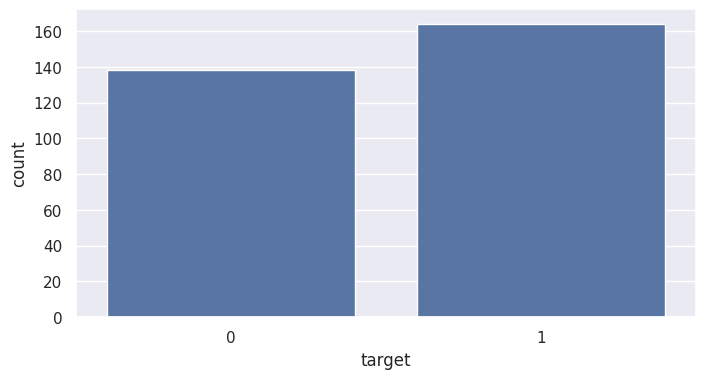

<Figure size 1200x500 with 0 Axes>

target
1    164
0    138
Name: target, dtype: int64


In [116]:
y = dataset["target"]

sns.countplot(x=y)
plt.figure(figsize=(12,5))
plt.show()

target_temp = dataset['target'].value_counts()
target_temp.name = 'target'

print(target_temp)


In [72]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.13


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [73]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Figure size 1200x600 with 0 Axes>

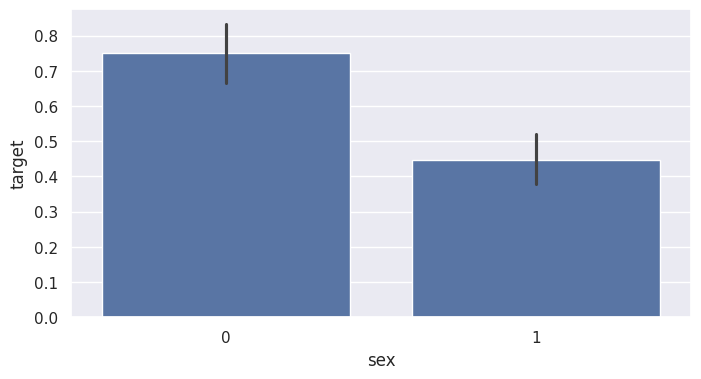

<Figure size 1200x600 with 0 Axes>

In [117]:
sns.barplot(x=dataset["sex"], y=y)
plt.figure(figsize=(12,6))

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [75]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<Figure size 1200x600 with 0 Axes>

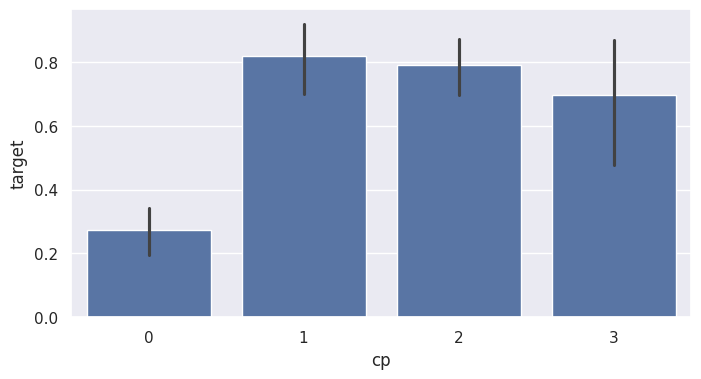

<Figure size 1200x600 with 0 Axes>

In [118]:
sns.barplot(x=dataset["cp"],y=y)
plt.figure(figsize=(12,6))


##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [77]:
dataset["fbs"].describe()

count    302.000000
mean       0.149007
std        0.356686
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [78]:
dataset["fbs"].unique()

array([1, 0])

<Figure size 1200x600 with 0 Axes>

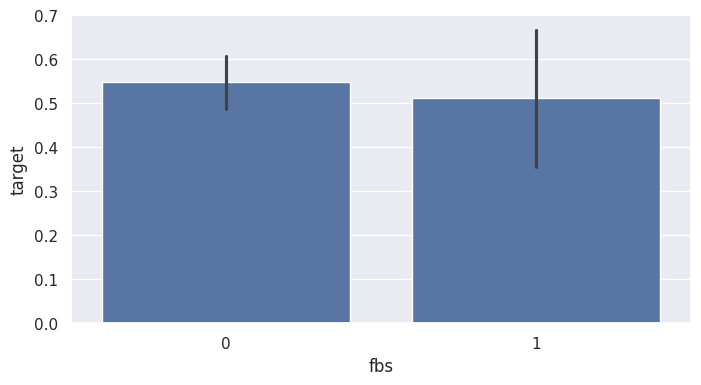

<Figure size 1200x600 with 0 Axes>

In [119]:
sns.barplot(x=dataset["fbs"],y=y)
plt.figure(figsize=(12,6))

##### Nothing extraordinary here

### Analysing the restecg feature

In [80]:
dataset["restecg"].unique()

array([0, 1, 2])

<Figure size 1200x600 with 0 Axes>

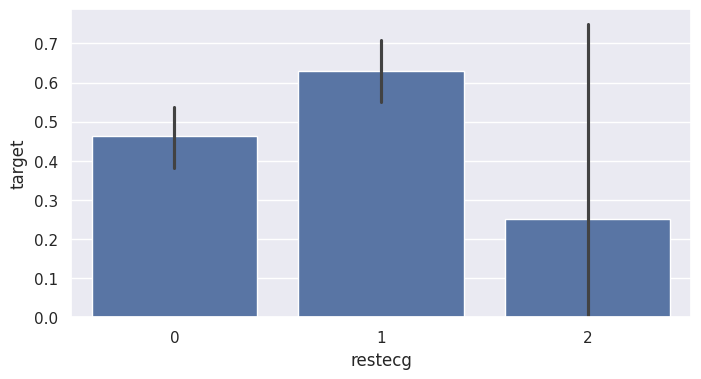

<Figure size 1200x600 with 0 Axes>

In [120]:
sns.barplot(x=dataset["restecg"],y=y)
plt.figure(figsize=(12,6))

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [82]:
dataset["exang"].unique()

array([0, 1])

<Figure size 1200x600 with 0 Axes>

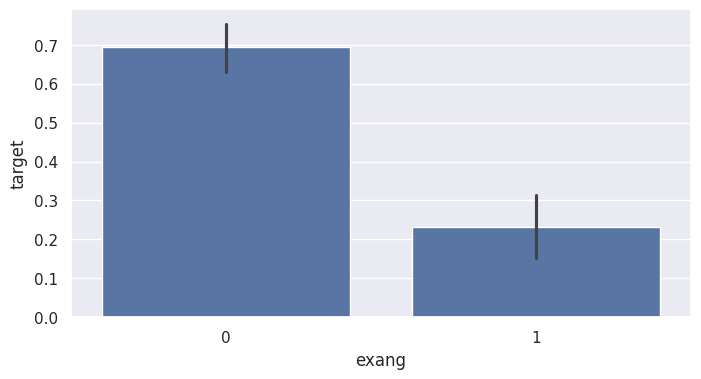

<Figure size 1200x600 with 0 Axes>

In [121]:
sns.barplot(x=dataset["exang"],y=y)
plt.figure(figsize=(12,6))

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [84]:
dataset["slope"].unique()

array([0, 2, 1])

<Figure size 1200x600 with 0 Axes>

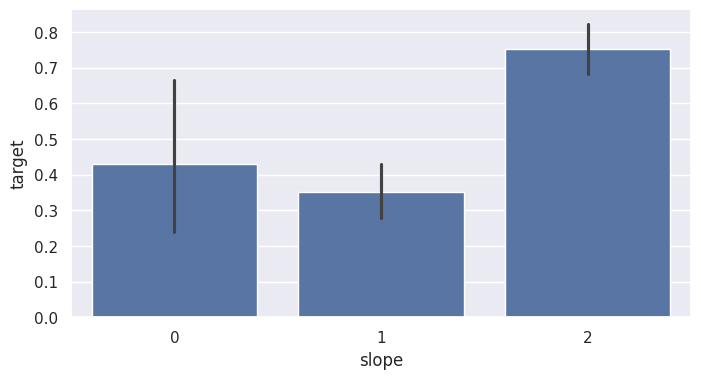

<Figure size 1200x600 with 0 Axes>

In [122]:
sns.barplot(x=dataset["slope"],y=y)
plt.figure(figsize=(12,6))

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [86]:
#number of major vessels (0-3) colored by flourosopy

In [87]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Figure size 1200x600 with 0 Axes>

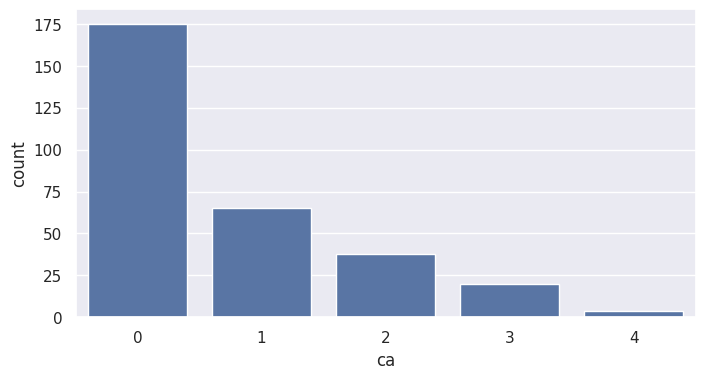

<Figure size 1200x600 with 0 Axes>

In [123]:
sns.countplot(x=dataset["ca"])
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

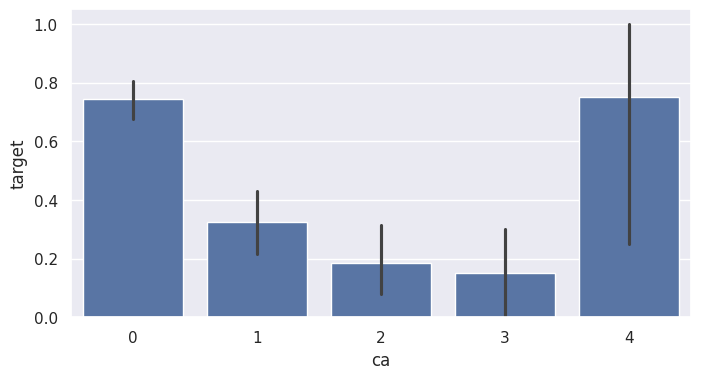

<Figure size 1200x600 with 0 Axes>

In [124]:
sns.barplot(x=dataset["ca"],y=y)
plt.figure(figsize=(12,6))

##### ca=4 has astonishingly large number of heart patients

Analysing the 'thal' feature

In [90]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Figure size 1200x600 with 0 Axes>

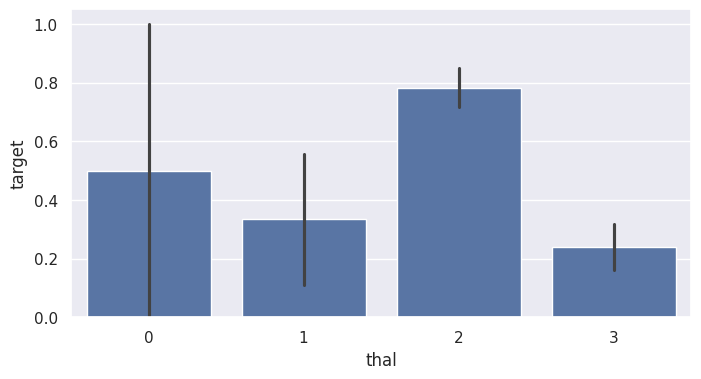

<Figure size 1200x600 with 0 Axes>

In [125]:
sns.barplot(x=dataset["thal"],y=y)
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

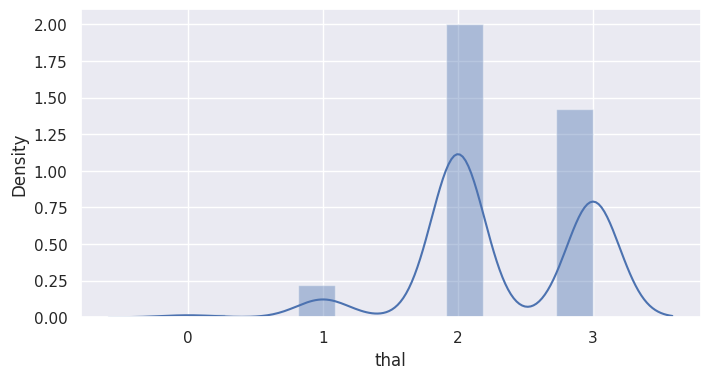

<Figure size 1200x600 with 0 Axes>

In [126]:
sns.distplot(dataset["thal"])
plt.figure(figsize=(12,6))

## IV. Train Test split

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## V. Model Fitting

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [97]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.61 %


In [98]:
# Evaluation Metrics
accuracy_logreg = accuracy_score(Y_test, Y_pred_lr)
conf_matrix_logreg = confusion_matrix(Y_test, Y_pred_lr)
class_report_logreg = classification_report(Y_test, Y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print('Confusion Matrix:\n', conf_matrix_logreg)
print('Classification Report:\n', class_report_logreg)

Logistic Regression Accuracy: 0.8360655737704918
Confusion Matrix:
 [[25  4]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
# Evaluation Metrics
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
class_report_rf = classification_report(Y_test, Y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Confusion Matrix:\n', conf_matrix_rf)
print('Classification Report:\n', class_report_rf)

Random Forest Accuracy: 0.9016393442622951
Confusion Matrix:
 [[26  3]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [48]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


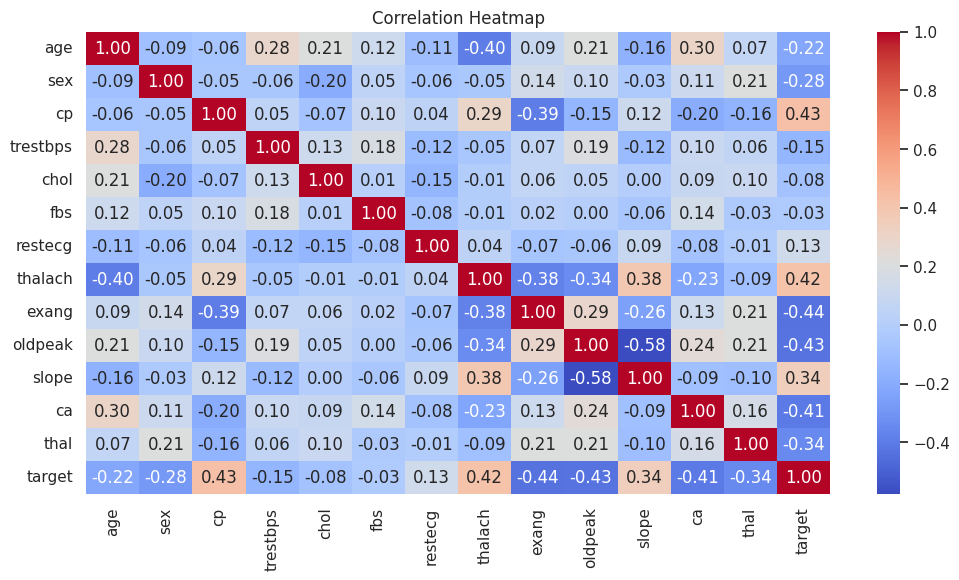

In [114]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## VI. Output final score

In [50]:
scores = [score_lr,score_rf]
algorithms = ["Logistic Regression","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.61 %
The accuracy score achieved using Random Forest is: 90.16 %


In [51]:
print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print(f'Random Forest Accuracy: {accuracy_rf}')

Logistic Regression Accuracy: 0.8360655737704918
Random Forest Accuracy: 0.9016393442622951


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

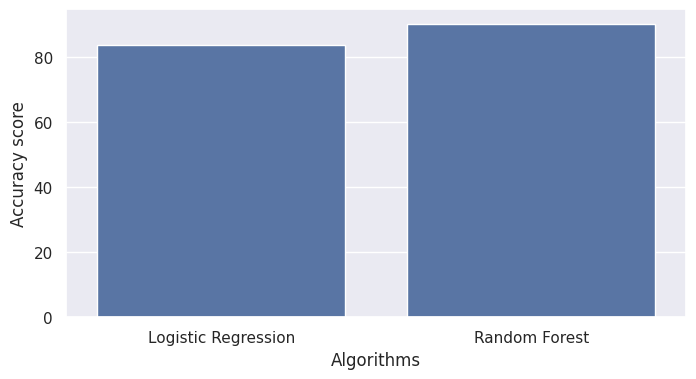

In [110]:
sns.set(rc={'figure.figsize':(8,4)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

Random Forest has good result as compare to Logistic Regression
